<a href="https://colab.research.google.com/github/naina001T/Data-Cleaning-and-Analysis/blob/main/Google_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files

uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore (3).csv


In [7]:
import pandas as pd
df=pd.read_csv("googleplaystore.csv")

In [8]:
df.shape


(10841, 13)

In [9]:
import numpy as np

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# ***Cleaning Reviews column***

In [12]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [13]:
df['Reviews']=df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [14]:
df[df['Reviews'] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
df.at[10472,"Reviews"]='3000000'

In [16]:
df['Reviews']=df['Reviews'].astype(int)

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


## ***# Cleaning Rating Column***

In [18]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [19]:
df['Rating']=df['Rating'].fillna(0)

In [20]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        0. ,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

# ***Cleaning Size Column***

In [21]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [22]:
df['Size']=df['Size'].str.replace("M",'000')
df['Size']=df['Size'].str.replace("k","")
df['Size']=df['Size'].replace('Varies with device',np.nan)



In [23]:
df['Size']=df['Size'].str.replace("+","")
df['Size']=df['Size'].str.replace(",","")

In [24]:
df['Size'].unique()
df['Size']=df['Size'].astype(float)

In [25]:
df['Size'].isnull().sum()


np.int64(1695)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


# ***Cleaning Installs Column***

In [27]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [28]:
df['Installs']=df['Installs'].str.replace("+","")

In [29]:
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0', 'Free'], dtype=object)

In [30]:
df['Installs']=df['Installs'].replace("Free",np.nan)

In [31]:
df['Installs']=df['Installs'].str.replace(",","")

In [32]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', nan],
      dtype=object)

In [33]:
df['Installs']=df['Installs'].astype(float)

In [34]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [35]:
df['Price']=df['Price'].str.replace("$","")

In [36]:
df['Price']=df['Price'].replace("Everyone","")



In [37]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '',
       '1.20', '1.04'], dtype=object)

In [38]:
df['Price']=df['Price'].replace("",np.nan)
df['Price']=df['Price'].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


# ***Cleaning Last Updated Column***

In [40]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [41]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [42]:
df['Last Updated']=pd.to_datetime(df['Last Updated'], errors='coerce')

In [43]:
df['LD_Day']=df['Last Updated'].dt.day
df['LD_Month']=df['Last Updated'].dt.month
df['LD_year']=df['Last Updated'].dt.year

In [44]:
df.drop("Last Updated",axis=1,inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  LD_Day          10840 non-null  float64
 13  LD_Month        10840 non-null  float64
 14  LD_year         10840 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.2+ MB


# **EDA**
Removing the Duplicated from App and Category column

In [46]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,LD_Day,LD_Month,LD_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20.0,6.0,2018.0


In [47]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,LD_Day,LD_Month,LD_year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0.0,Everyone,Business,Varies with device,4.0.3 and up,26.0,2.0,2018.0
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,31.0,7.0,2018.0
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.0,Everyone,Business,2.19.0.204537701,4.4 and up,24.0,7.0,2018.0
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000.0,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,20.0,7.0,2018.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0.0,Everyone,Business,4.3.0.508,4.4 and up,16.0,7.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000.0,Free,0.0,Mature 17+,Dating,2.2,4.0 and up,25.0,2.0,2016.0
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000.0,Free,0.0,Everyone,Communication,5.2,5.0 and up,6.0,7.0,2018.0
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000.0,Free,0.0,Everyone,Medical,2.1.0.372,4.4 and up,24.0,3.0,2018.0
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000.0,Free,0.0,Everyone,Shopping,3.9,4.4 and up,30.0,7.0,2018.0


In [48]:
df[df.duplicated('App')].shape

(1181, 15)

In [49]:
df=df.drop_duplicates(subset='App',keep='first')


In [50]:
df.shape

(9660, 15)

In [51]:
df[df.duplicated('Category')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,LD_Day,LD_Month,LD_year
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20.0,6.0,2018.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,1.0,2.3 and up,26.0,3.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,1.48,4.1 and up,25.0,7.0,2017.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,1.0,4.1 and up,6.0,7.0,2018.0
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,1000.0,Free,0.0,Everyone,Medical,1.0,2.2 and up,20.0,1.0,2017.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19.0,1.0,2015.0


In [52]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [53]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']
numerical_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'LD_Day',
 'LD_Month',
 'LD_year']

In [54]:
for column in categorical_features:
  print(df[column].value_counts(normalize=True)*100)
  print('****************')

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010352
Photo Editor & Candy Camera & Grid & ScrapBook        0.010352
Coloring book moana                                   0.010352
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010352
Sketch - Draw & Paint                                 0.010352
                                                        ...   
Photo Designer - Write your name with shapes          0.010352
Learn To Draw Kawaii Characters                       0.010352
3D Color Pixel by Number - Sandbox Art Coloring       0.010352
Mandala Coloring Book                                 0.010352
Tattoo Name On My Photo Editor                        0.010352
Name: proportion, Length: 9660, dtype: float64
****************
Category
FAMILY                 18.964803
GAME                    9.927536
TOOLS                   8.561077
BUSINESS                4.347826
MEDICAL                 4.089027
PERSONALIZATION         3.892340
PRODUCTIVITY            3.871636

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

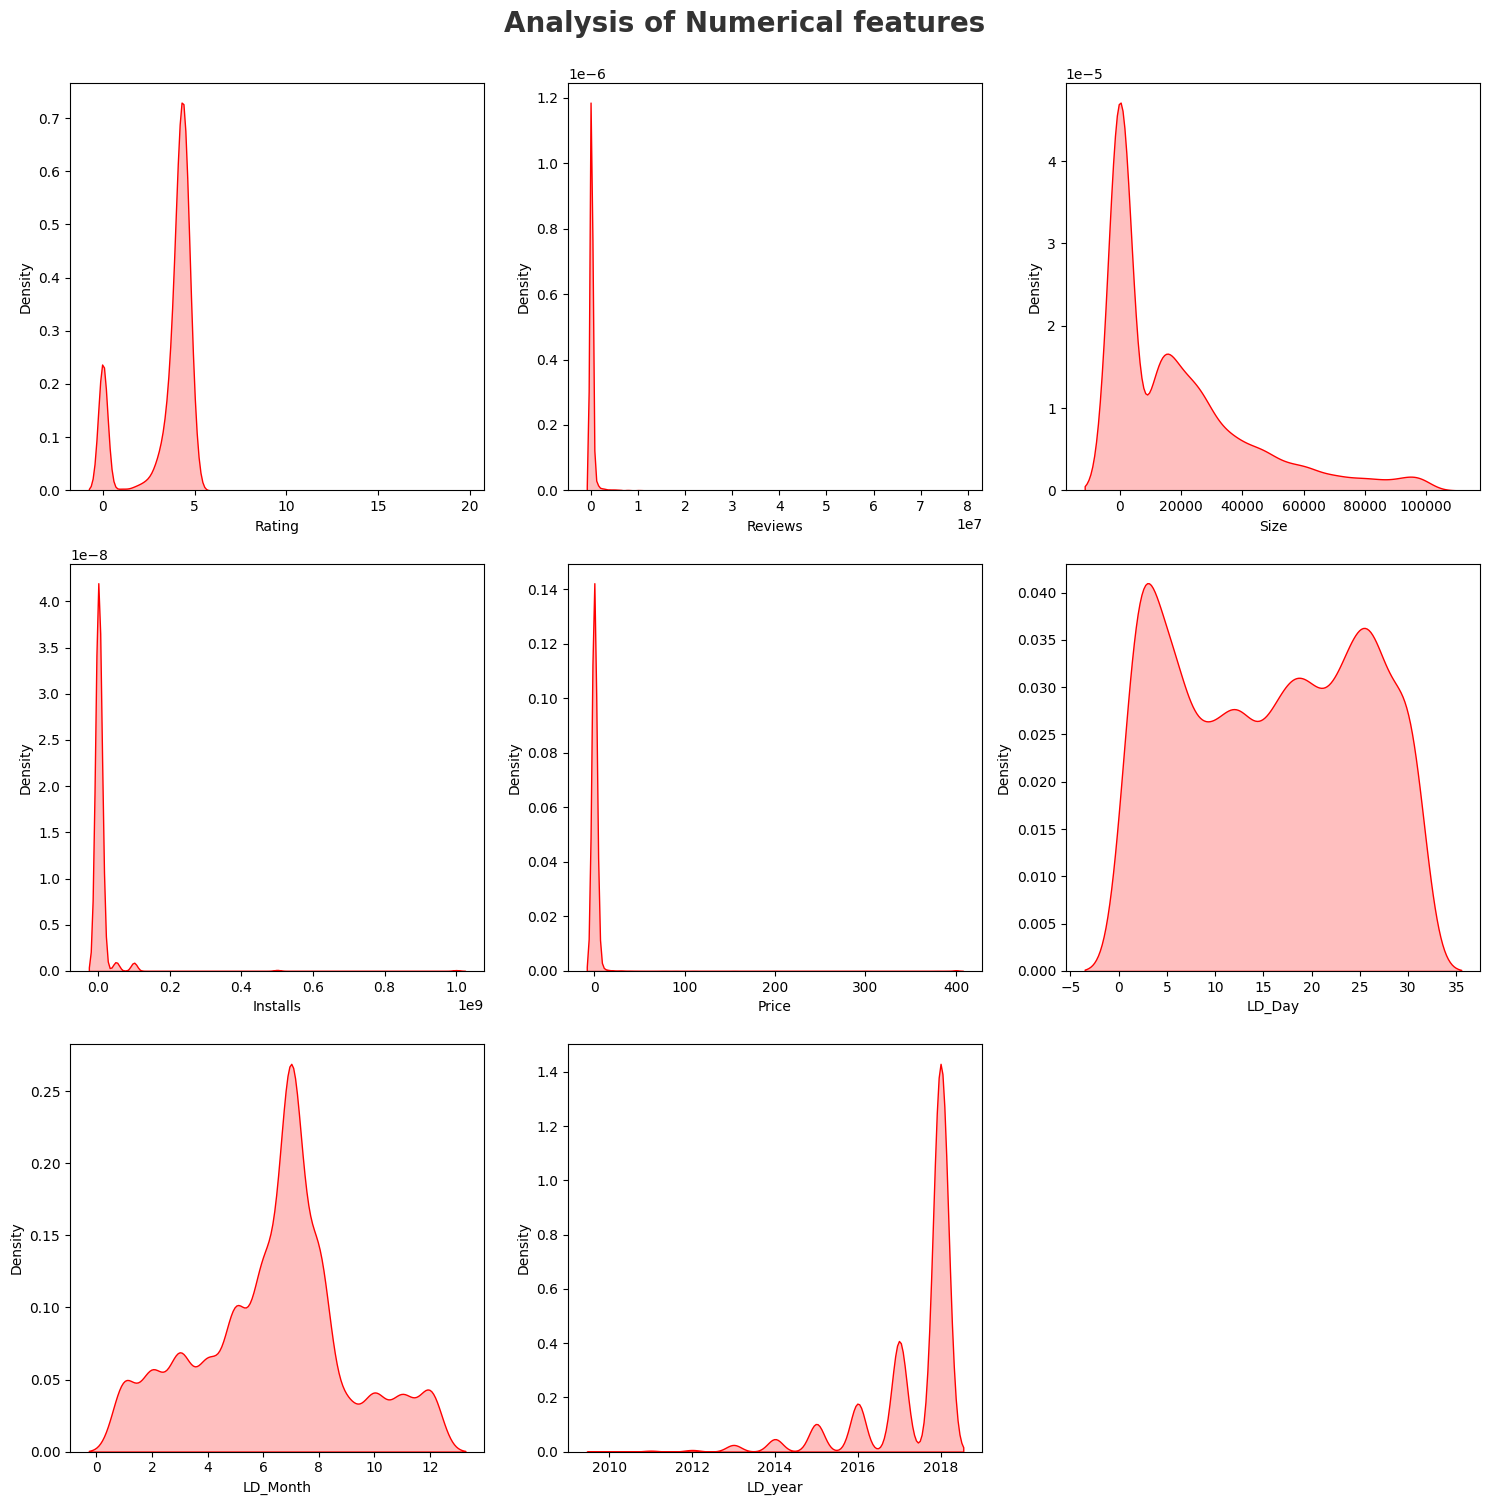

In [56]:
plt.figure(figsize=(15,15))
plt.suptitle("Analysis of Numerical features",fontsize='20',fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numerical_features)):
  plt.subplot(3,3,i+1)
  sns.kdeplot(x=df[numerical_features[i]],fill=True,color='red')
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

`Rating and Year is left skewed and while reviews,size,install and price right skewed `

/tmp/ipython-input-57-1641715453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette='Set2')
/tmp/ipython-input-57-1641715453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette='Set2')


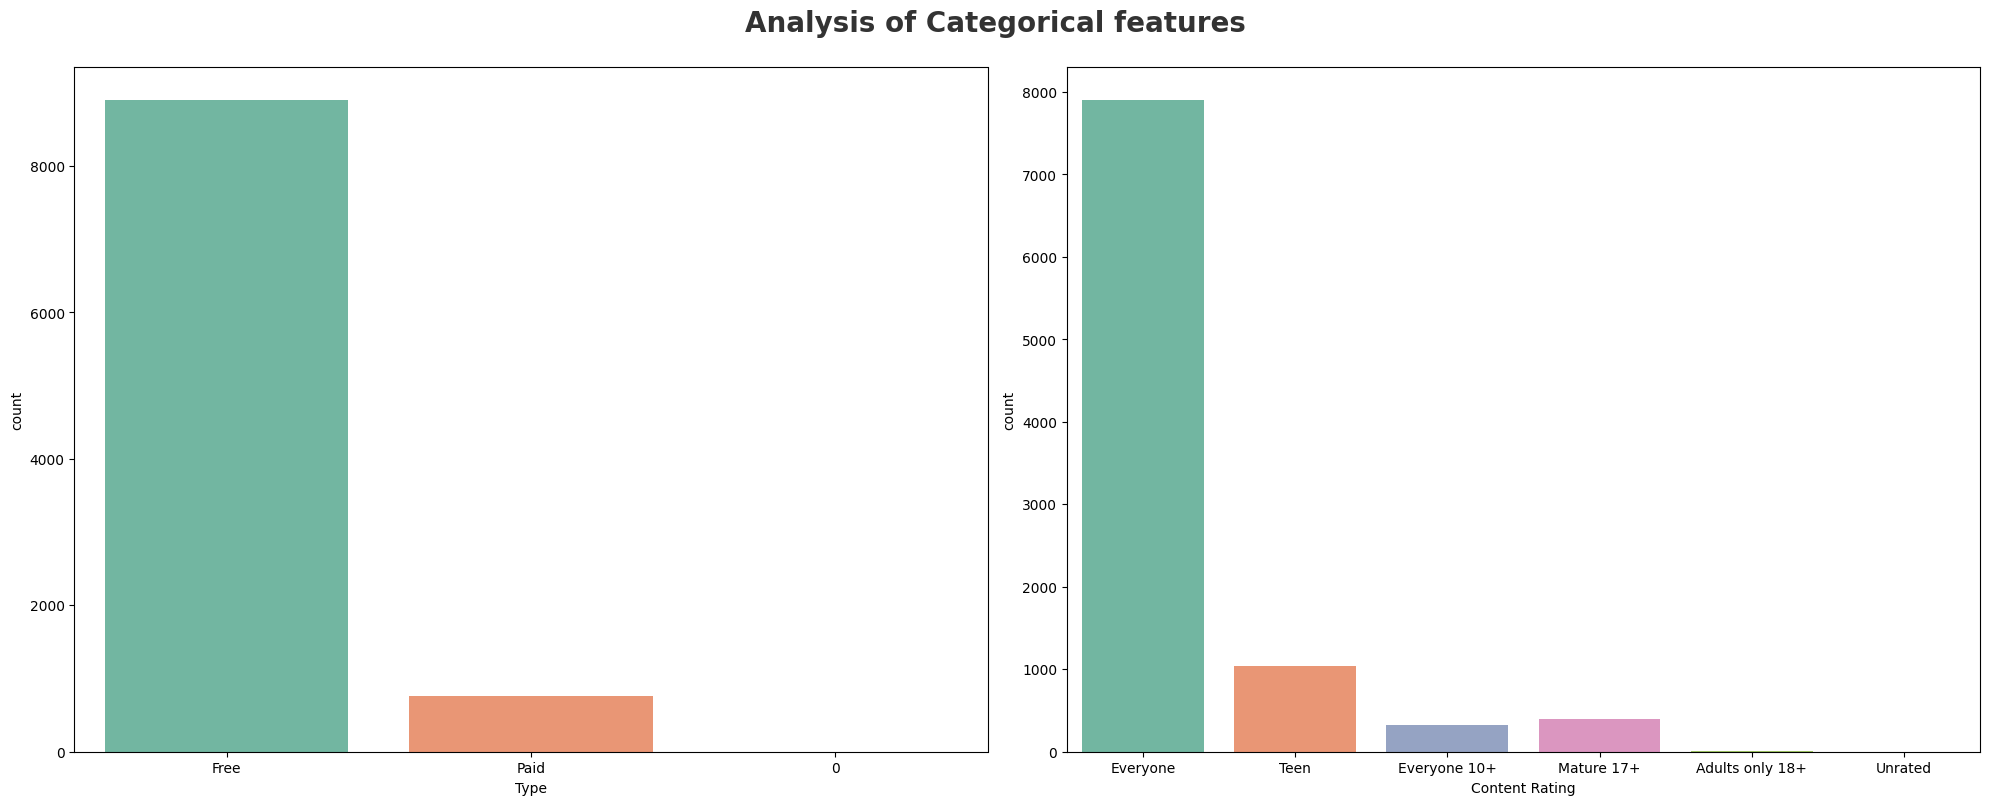

In [57]:
plt.figure(figsize=(20,15))
plt.suptitle("Analysis of Categorical features",fontsize='20',fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']
for i in range(0,len(category)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df[category[i]],palette='Set2')
  plt.xlabel(category[i])
  plt.tight_layout()

# ***Which is the most popular category***

<Axes: ylabel='count'>

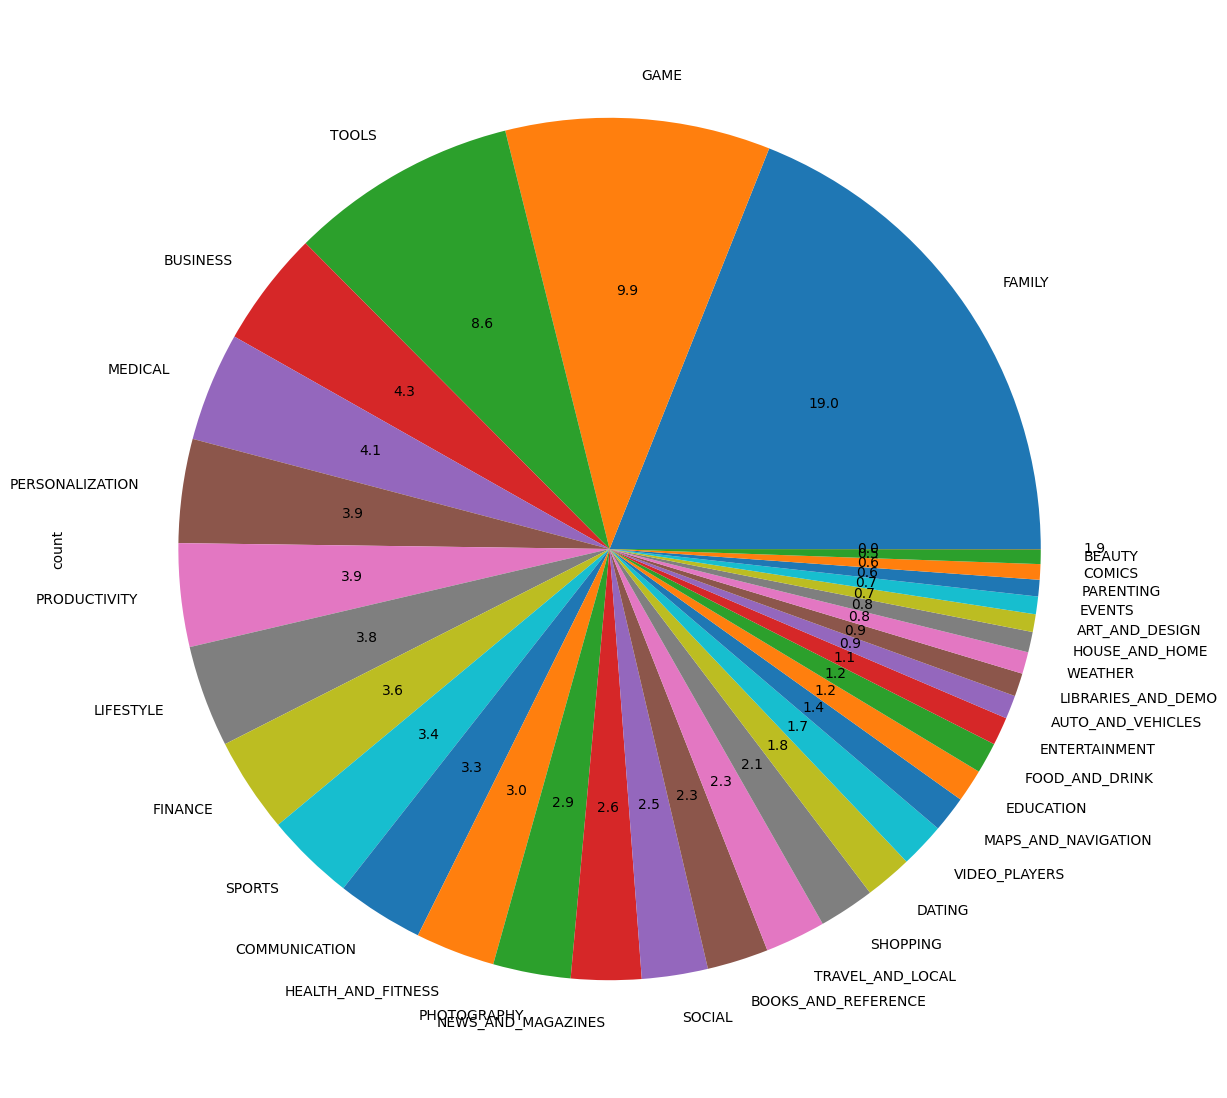

In [58]:
df['Category'].value_counts().plot.pie(figsize=(15,14),autopct='%1.1f')

# What are the Top 10 most popular category
***

In [59]:
df['Category'].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


/tmp/ipython-input-60-1572489266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Category'].value_counts()[:10].index,y=df['Category'].value_counts()[:10].values,palette='Set2')


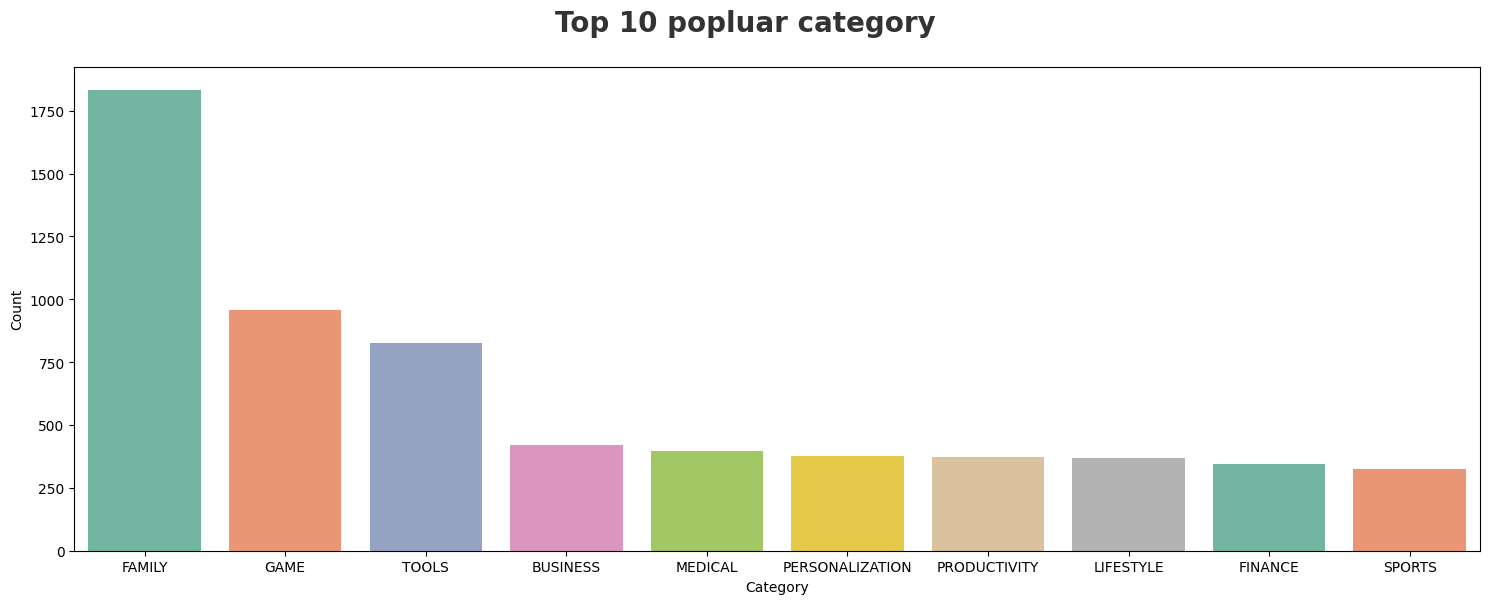

In [60]:
plt.figure(figsize=(15,6))
plt.suptitle("Top 10 popluar category",fontsize='20',fontweight='bold',alpha=0.8,y=1.)
sns.barplot(x=df['Category'].value_counts()[:10].index,y=df['Category'].value_counts()[:10].values,palette='Set2')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()

# **Which Category has the largest number of Installation**

In [63]:
installs_by_category = df.groupby('Category')['Installs'].sum()
sorted_installs_by_category = installs_by_category.sort_values(ascending=False)
display(sorted_installs_by_category)

,Installs
Category,
GAME,1.387892e+10
COMMUNICATION,1.103828e+10
TOOLS,8.001772e+09
PRODUCTIVITY,5.793091e+09
SOCIAL,5.487868e+09
PHOTOGRAPHY,4.649148e+09
FAMILY,4.427942e+09
VIDEO_PLAYERS,3.926903e+09
TRAVEL_AND_LOCAL,2.894887e+09


/tmp/ipython-input-64-2947163075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='Set2')


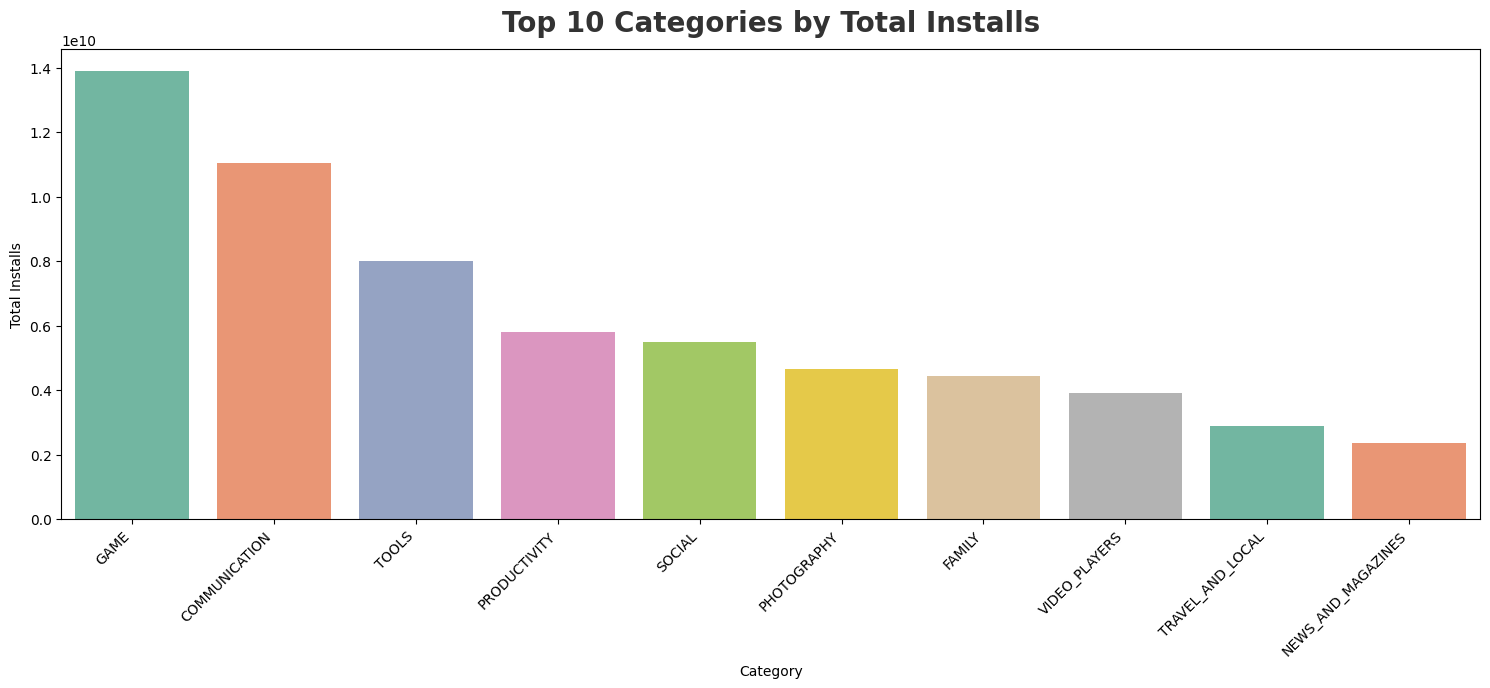

In [64]:
plt.figure(figsize=(15, 7))
top_10_categories = sorted_installs_by_category.head(10)
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='Set2')
plt.title("Top 10 Categories by Total Installs", fontsize=20, fontweight='bold', alpha=0.8, y=1.02)
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **What are the Top 5 most installed App in each popular category**

In [65]:
top_10_categories = df['Category'].value_counts().head(10).index
top_10_categories

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS'],
      dtype='object', name='Category')

In [66]:
top_10_df = df[df['Category'].isin(top_10_categories)]
top_10_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,LD_Day,LD_Month,LD_year
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,NaN,10000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,30.0,7.0,2018.0
188,Indeed Job Search,BUSINESS,4.3,674730,NaN,50000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,21.0,5.0,2018.0
189,Uber Driver,BUSINESS,4.4,1254730,NaN,10000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,3.0,8.0,2018.0
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29000.0,5000000.0,Free,0.0,Everyone,Business,3.4.2,5.0 and up,17.0,7.0,2018.0
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,NaN,1000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,4.0,5.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,0.0,0,9.6,10.0,Free,0.0,Everyone,Business,1.1.5,4.0 and up,29.0,9.0,2016.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,1.48,4.1 and up,25.0,7.0,2017.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,1.0,4.1 and up,6.0,7.0,2018.0
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,1000.0,Free,0.0,Everyone,Medical,1.0,2.2 and up,20.0,1.0,2017.0


In [67]:
grouped_apps = top_10_df.groupby('Category')['App'].apply(list)
print(grouped_apps)

Category
BUSINESS           [Visual Voicemail by MetroPCS, Indeed Job Sear...
FAMILY             [Jewels Crush- Match 3 Puzzle, Coloring & Lear...
FINANCE            [K PLUS, ING Banking, Citibanamex Movil, The p...
GAME               [ROBLOX, Subway Surfers, Candy Crush Saga, Sol...
LIFESTYLE          [Dollhouse Decorating Games, metroZONE, Easy H...
MEDICAL            [Monash Uni Low FODMAP Diet, iBP Blood Pressur...
PERSONALIZATION    [Nova Launcher, Funny Ringtones, ZEDGE™ Ringto...
PRODUCTIVITY       [Microsoft Word, All-In-One Toolbox: Cleaner, ...
SPORTS             [ESPN, Free Sports TV, LiveScore: Live Sport U...
TOOLS              [Moto File Manager, Google, Google Translate, ...
Name: App, dtype: object


In [68]:
top_5_apps_per_category = grouped_apps.groupby('Category').head(5)
top_5_apps_per_category

,App
Category,
BUSINESS,"[Visual Voicemail by MetroPCS, Indeed Job Sear..."
FAMILY,"[Jewels Crush- Match 3 Puzzle, Coloring & Lear..."
FINANCE,"[K PLUS, ING Banking, Citibanamex Movil, The p..."
GAME,"[ROBLOX, Subway Surfers, Candy Crush Saga, Sol..."
LIFESTYLE,"[Dollhouse Decorating Games, metroZONE, Easy H..."
MEDICAL,"[Monash Uni Low FODMAP Diet, iBP Blood Pressur..."
PERSONALIZATION,"[Nova Launcher, Funny Ringtones, ZEDGE™ Ringto..."
PRODUCTIVITY,"[Microsoft Word, All-In-One Toolbox: Cleaner, ..."
SPORTS,"[ESPN, Free Sports TV, LiveScore: Live Sport U..."


/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


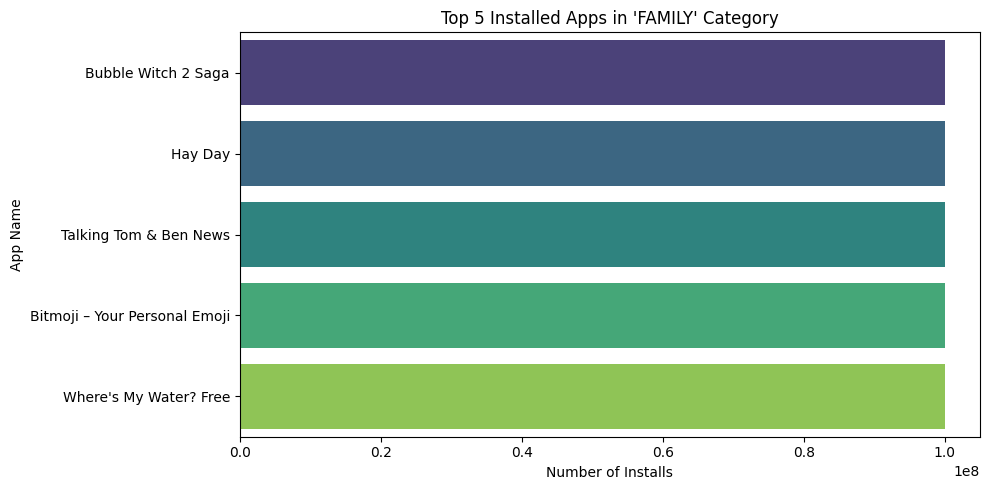

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


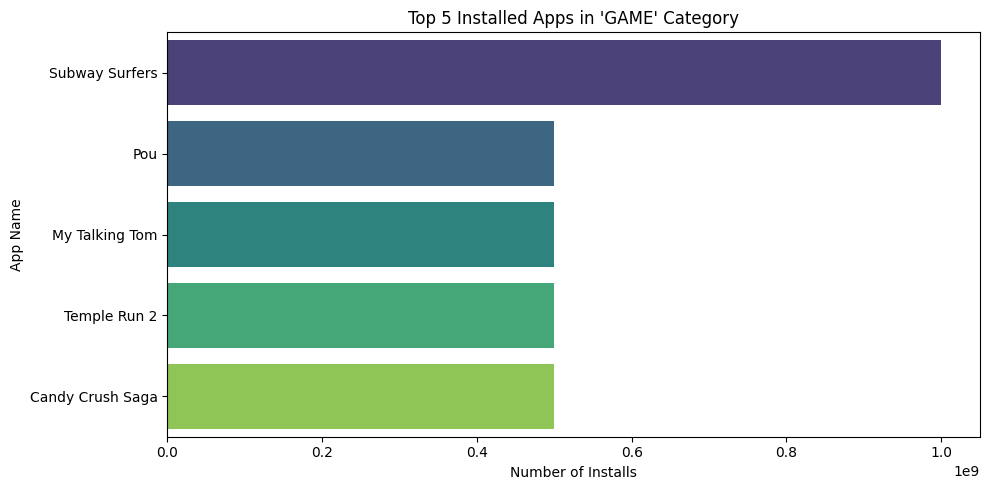

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


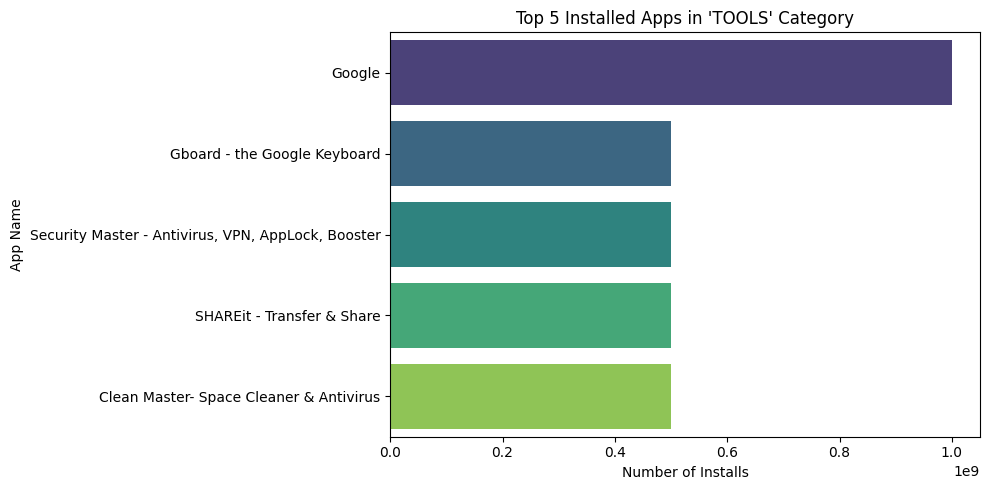

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


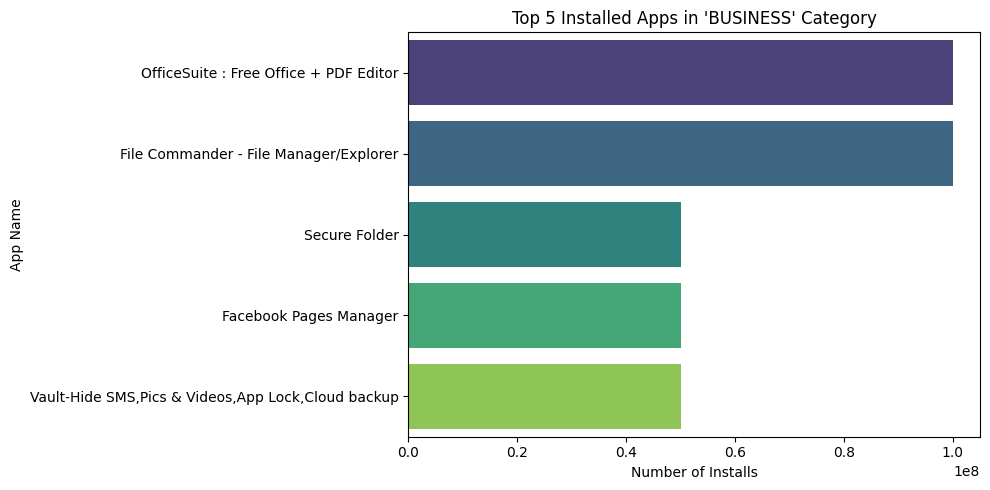

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


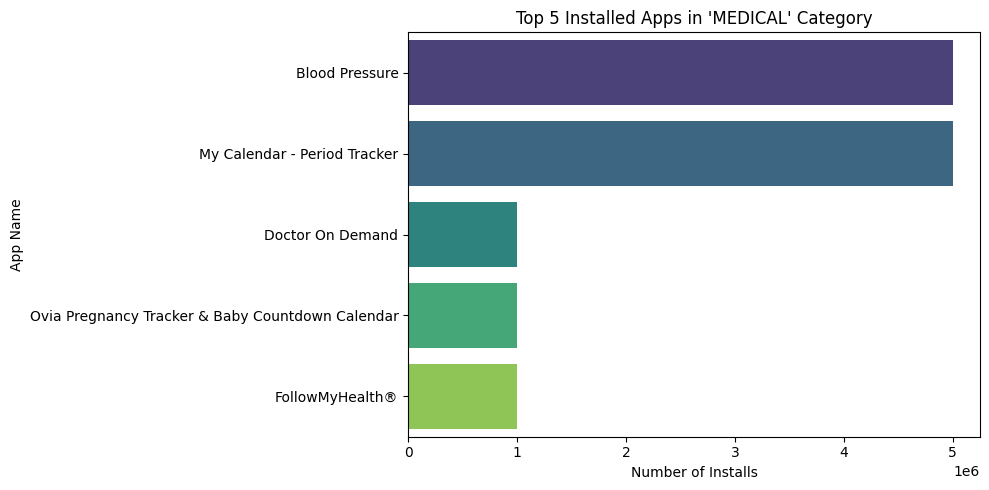

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


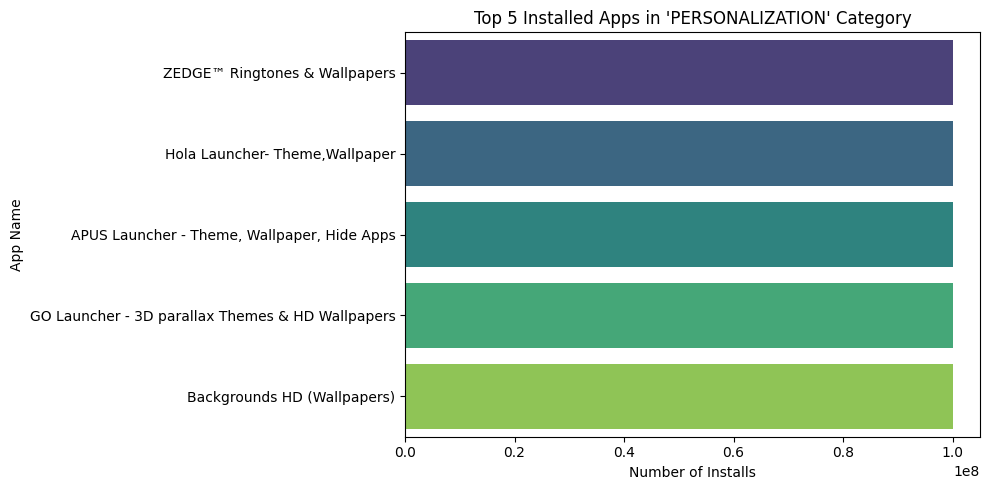

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


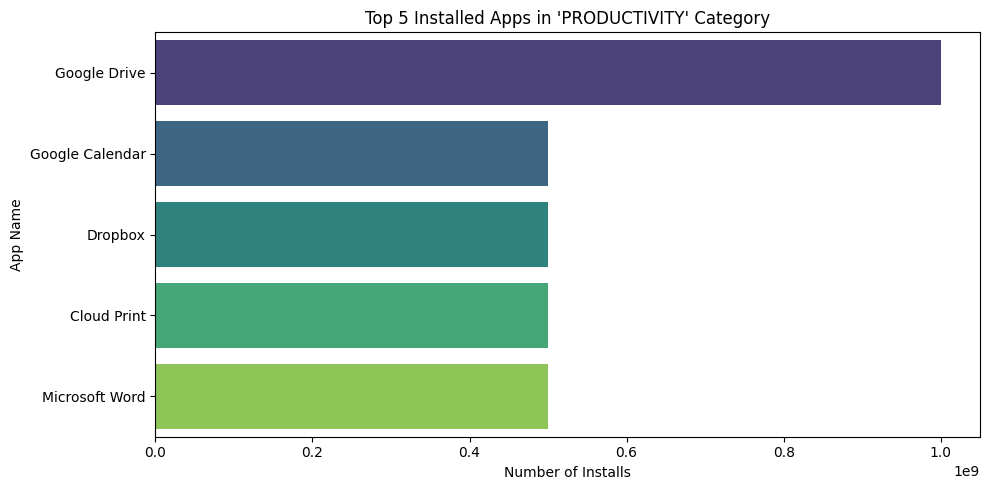

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


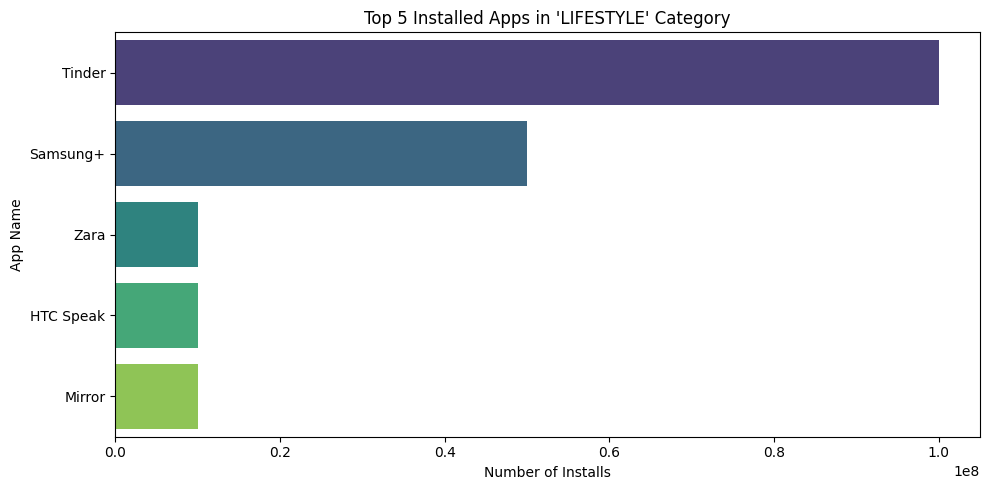

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


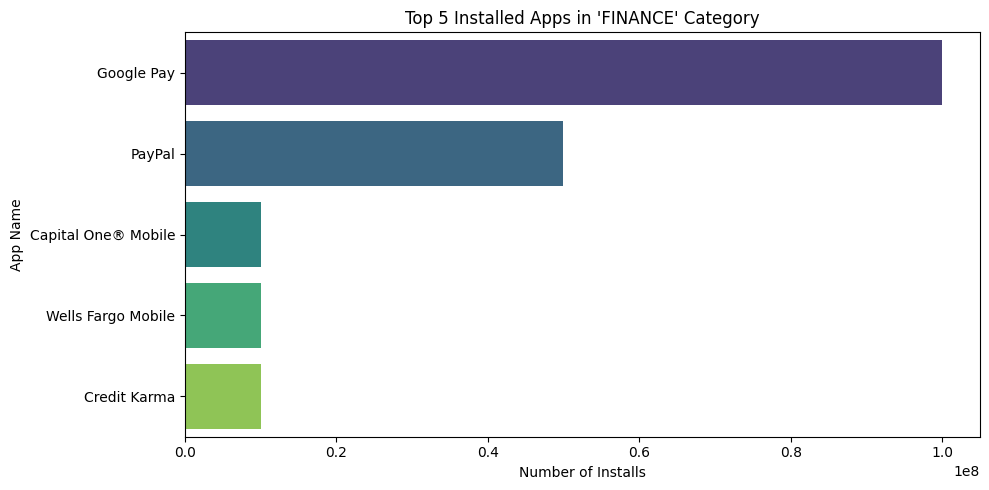

/tmp/ipython-input-69-137710455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')


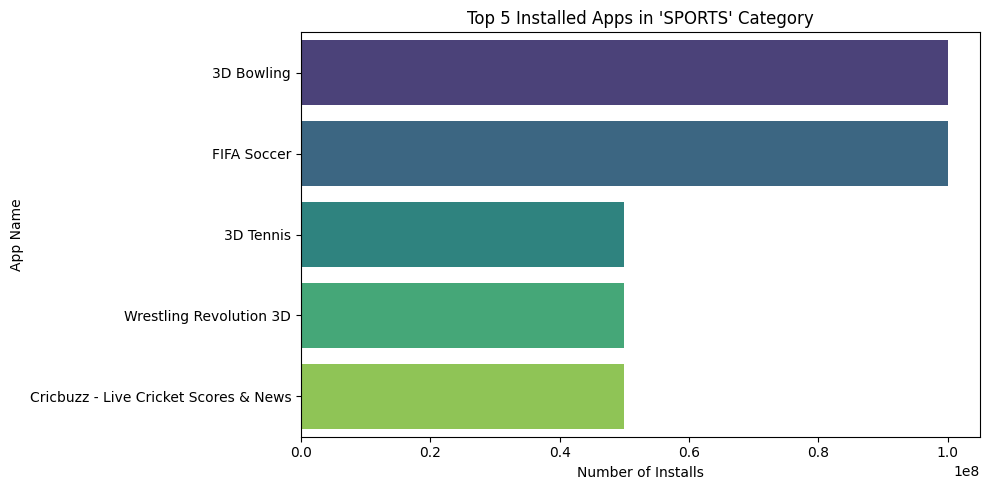

In [69]:
for category in top_10_categories:
    cat_df = top_10_df[top_10_df['Category'] == category]
    top_5 = cat_df.sort_values('Installs', ascending=False).head(5)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_5, x='Installs', y='App', palette='viridis')
    plt.title(f"Top 5 Installed Apps in '{category}' Category")
    plt.xlabel('Number of Installs')
    plt.ylabel('App Name')
    plt.tight_layout()
    plt.show()

# ***How many apps in Google play store which got 5 rating***

In [71]:
five_rating=df[df['Rating']==5]
five_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,LD_Day,LD_Month,LD_year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000.0,Free,0.0,Everyone,Comics,2.0,4.0.3 and up,26.0,6.0,2018.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,3.0,4.0.3 and up,17.0,7.0,2018.0
615,Awake Dating,DATING,5.0,2,70000.0,100.0,Free,0.0,Mature 17+,Dating,2.2.9,4.4 and up,24.0,7.0,2018.0
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,4.0,4.0.3 and up,14.0,7.0,2018.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,8.2,4.0.3 and up,1.0,8.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100.0,Free,0.0,Everyone,Arcade,2.5a,4.1 and up,19.0,6.0,2017.0
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000.0,Free,0.0,Everyone,Lifestyle,0.7.1,4.4 and up,31.0,12.0,2017.0
10776,Monster Ride Pro,GAME,5.0,1,24000.0,10.0,Free,0.0,Everyone,Racing,2.0,2.3 and up,5.0,3.0,2018.0
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000.0,Free,0.0,Teen,Education,3.8.0,4.1 and up,27.0,6.0,2018.0


In [72]:
five_rating.groupby('Category')['App'].apply(list)

,App
Category,
ART_AND_DESIGN,[Spring flowers theme couleurs d t space]
BOOKS_AND_REFERENCE,"[R Programing Offline Tutorial, Hey AJ! It's S..."
BUSINESS,"[Ag Valley Cooperative, Jobs in Canada - Emplo..."
COMICS,"[Hojiboy Tojiboyev Life Hacks, Superheroes, Ma..."
COMMUNICATION,"[BS-Mobile, BV, Cb browser, chat dz, EJ messen..."
DATING,"[American Girls Mobile Numbers, Awake Dating, ..."
EVENTS,"[SUMMER SONIC app, Prosperity, Mindvalley U Ta..."
FAMILY,"[Hey AJ! It's Bedtime!, AJ Rafael Music Lesson..."
FINANCE,"[BI APP, BK Gold App, BxPort - Bitcoin Bx (Tha..."


/tmp/ipython-input-73-345504619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=five_rating, x='App', y='Category', palette='viridis')


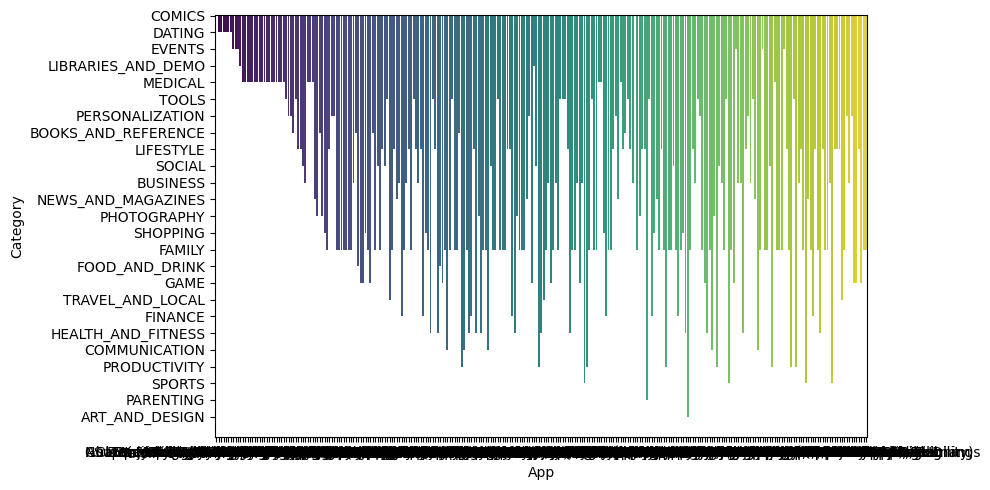

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(data=five_rating, x='App', y='Category', palette='viridis')
plt.tight_layout()

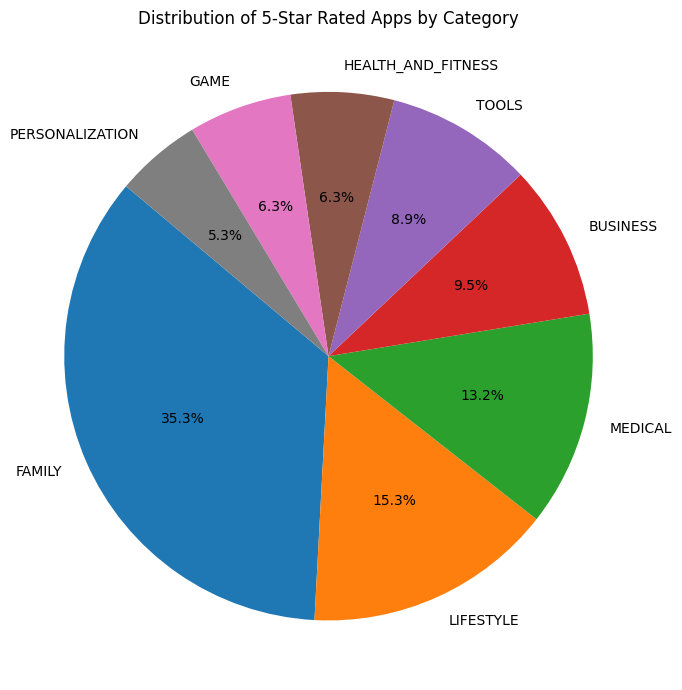

In [79]:
five_star_apps = df[df['Rating'] == 5.0]
rating_counts = five_star_apps['Category'].value_counts().sort_values(ascending=True)

top_categories = rating_counts.sort_values(ascending=False).head(8)
plt.figure(figsize=(7, 7))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of 5-Star Rated Apps by Category")
plt.axis('equal')
plt.tight_layout()
plt.show()